In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../data/processed/Brasil.csv')
df = df.append(pd.read_csv('../data/processed/Centro-Oeste.csv'),ignore_index=True)
df = df.append(pd.read_csv('../data/processed/Nordeste.csv'),ignore_index=True)
df = df.append(pd.read_csv('../data/processed/Norte.csv'),ignore_index=True)
df = df.append(pd.read_csv('../data/processed/Sudeste.csv'),ignore_index=True)
df = df.append(pd.read_csv('../data/processed/Sul.csv'),ignore_index=True)

In [3]:
df.index = pd.to_datetime(df['data'])

In [4]:
df

,Unnamed: 0,Unnamed: 0.1,regiao,estado,coduf,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos
data,,,,,,,,,,,,
2020-02-25,0,0,Brasil,NaN,76,2020-02-25,9,210147125.0,0.0,0,0,0
2020-02-26,1,1,Brasil,NaN,76,2020-02-26,9,210147125.0,1.0,1,0,0
2020-02-27,2,2,Brasil,NaN,76,2020-02-27,9,210147125.0,1.0,0,0,0
2020-02-28,3,3,Brasil,NaN,76,2020-02-28,9,210147125.0,1.0,0,0,0
2020-02-29,4,4,Brasil,NaN,76,2020-02-29,9,210147125.0,2.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-06,29703,618844,Sul,RS,43,2021-11-06,44,NaN,0.0,0,0,0
2021-11-07,29704,618845,Sul,RS,43,2021-11-07,45,NaN,0.0,0,0,0
2021-11-08,29705,618846,Sul,RS,43,2021-11-08,45,NaN,0.0,0,0,0


In [5]:
aux =df.groupby(by=[df.index.year,df.index.month,df['regiao']]).sum()

In [6]:
aux

Unnamed: 0  Unnamed: 0.1  coduf  semanaEpi  \
data data regiao                                                     
2020 2    Brasil                10            10    380         45   
          Centro-Oeste       80620         80620   1030        180   
          Nordeste           85410         85410   1125        405   
          Norte              22190         22190    490        315   
          Sudeste            58500         58500    655        180   
...                            ...           ...    ...        ...   
2021 11   Centro-Oeste     1677080      14241310   3090       2664   
          Nordeste         4807800      15240810   4500       7992   
          Norte            2511400        760210   1400       4440   
          Sudeste          2205960      16000790   2620       3552   
          Sul              1682400      17337550   2520       2664   

                        populacaoTCU2019  casosAcumulado  casosNovos  \
data data regiao                                                       
2020 2    Brasil            1.050736e+09             5.0           2   
          Centro-Oeste      8.148537e+07             0.0           0   
          Nordeste          2.853583e+08             0.0           0   
          Norte             9.215490e+07             0.0           0   
          Sudeste           4.418572e+08             5.0           2   
...                                  ...             ...         ...   
2021 11   Centro-Oeste      1.629707e+08      23455135.0       11237   
          Nordeste          5.707165e+08      48833675.0       23825   
          Norte             1.843098e+08      18709605.0        7178   
          Sudeste           8.837143e+08      85450455.0       30419   
          Sul               2.997598e+08      42590589.0       25993   

                        obitosAcumulado  obitosNovos  
data data regiao                                      
2020 2    Brasil                      0            0  
          Centro-Oeste                0            0  
          Nordeste                    0            0  
          Norte                       0            0  
          Sudeste                     0            0  
...                                 ...          ...  
2021 11   Centro-Oeste           585337          219  
          Nordeste              1185131          298  
          Norte                  468838           74  
          Sudeste               2901104         1132  
          Sul                    961406          499  

[132 rows x 9 columns]

In [7]:

auxcase = aux['casosNovos']
auxcase = auxcase.reset_index(level=2)
auxdeath = aux['obitosNovos']
auxdeath = auxdeath.reset_index(level=2)

In [8]:
auxdeath

regiao  obitosNovos
data data                           
2020 2           Brasil            0
     2     Centro-Oeste            0
     2         Nordeste            0
     2            Norte            0
     2          Sudeste            0
...                 ...          ...
2021 11    Centro-Oeste          219
     11        Nordeste          298
     11           Norte           74
     11         Sudeste         1132
     11             Sul          499

[132 rows x 2 columns]

In [9]:
auxdeath = auxdeath.pivot(columns='regiao')

In [17]:
auxdeath

obitosNovos                                           
regiao         Brasil Centro-Oeste Nordeste Norte Sudeste    Sul
data data                                                       
2020 2              0            0        0     0       0      0
     3            201            5       23     4     162      9
     4           5700           76     1518   708    3232    171
     5          23413          297     7344  4979   10448    369
     6          30280         1363    10436  3836   13640   1068
     7          32881         3579     9380  2323   14349   3303
     8          28906         3908     6527  1626   12810   4104
     9          22571         3408     4026  1570   10457   3085
     10         15932         2190     2985   932    7796   2070
     11         13236         1309     2294   818    6235   2605
     12         21829         1713     3287  1235   10257   5377
2021 1          29555         2153     3801  4138   14582   4955
     2          30438         2386     5002  4908   13849   4391
     3          66573         7059    12511  5457   25724  15948
     4          82266         8683    14094  5377   40693  13570
     5          59010         5137    12257  3220   29485   9013
     6          55275         5193    11095  2339   27681   9104
     7          38304         3412     6023  1561   19773   7592
     8          24043         3219     3064   997   12947   3886
     9          16336         1985     1501   508    9539   2829
     10         11075         1327     1199   310    5823   2437
     11          2212          219      298    74    1132    499

<AxesSubplot:xlabel='data,data'>

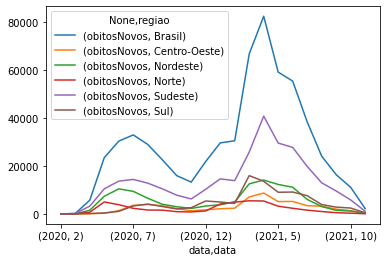

In [16]:
auxdeath.plot()

<AxesSubplot:xlabel='data,data'>

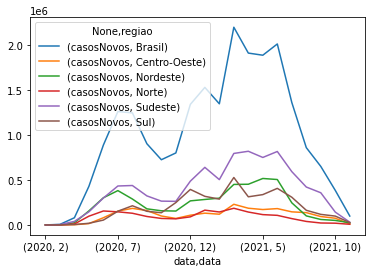

In [21]:
auxcase.plot()

In [19]:
auxcase = auxcase.pivot(columns='regiao')

<AxesSubplot:xlabel='data,data'>

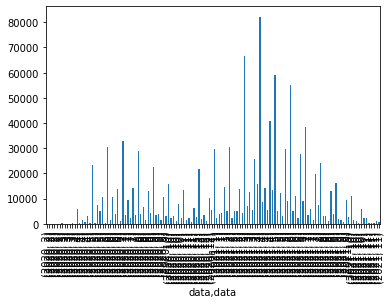

In [101]:
auxdeath.plot.bar(legend=False)

In [25]:
auxdeath.to_csv('../data/processed/analiseobito.csv')

In [32]:
auxcase.to_csv('../data/processed/analisecasoss.csv')

<AxesSubplot:xlabel='data,data'>

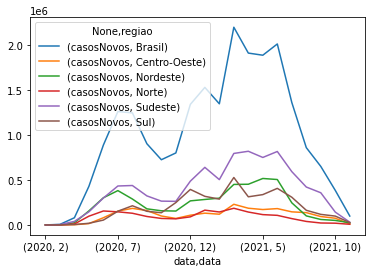

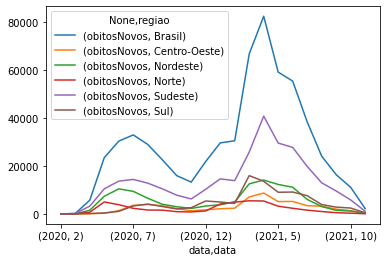

In [35]:
auxcase.plot()
auxdeath.plot()